## Introduction to the Age–Oxygen–Outcome Visualization

This notebook examines how patient age and oxygen saturation levels relate to clinical outcomes.  
Scatterplots are an effective way to study these relationships because they show how two continuous variables interact while simultaneously highlighting outcome differences through color.

The plot in this notebook displays:
- **Age (years)** on the horizontal axis  
- **Oxygen saturation (%)** on the vertical axis  
- **Outcome category** (Alive, Deceased, Unknown) encoded using color  

By visualizing the data in this way, we can observe:
- whether lower oxygen saturation is associated with higher mortality,  
- whether certain age groups cluster at more severe oxygen levels,  
- and how the distribution of points differs between outcome categories.

This plot serves as a foundation for understanding the interplay between physiological measurements (O₂ levels), demographic characteristics (age), and patient outcomes.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

### Loading the Patient Dataset

Here we load the dataset containing patient demographics, oxygen saturation measurements, and outcome information.  
This dataset forms the basis of the analysis, and loading it into a pandas DataFrame allows us to perform filtering, transformation, and visualization in later steps.


In [2]:
#  Setup 
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

# Initialize random number generator for reproducibility, Panda's utilizes NumPy module not "random"
np.random.seed(42)

In [3]:
# Load data
df = pd.read_csv("final_with_deceased.csv")

### Creating a Clean Outcome Label (Deceased vs Alive)

The dataset stores outcome information in a `deceased` column with values `"Y"` and `"N"`.  
This cell maps those codes into more interpretable labels:

- `"Y"` → **Deceased**  
- `"N"` → **Alive**

Any missing or unexpected entries are labeled `"Unknown"`.

Converting this into a categorical variable ensures consistent color mapping when plotting and makes the final visualization easier to read and interpret.


In [4]:
df["deceased_flag"] = df["deceased"].map({"Y": "Deceased", "N": "Alive"}).fillna("Unknown").astype("category")

### Visualizing Age vs. Oxygen Saturation by Outcome

This scatterplot shows how **age** and **oxygen saturation (%)** relate across different patient outcomes.

- **X-axis:** age at visit (years)  
- **Y-axis:** oxygen saturation (%)  
- **Color (hue):** outcome category (Alive, Deceased, Unknown)

By dropping rows with missing age or oxygen values, we ensure the plot accurately reflects interpretable measurements.

Interpretability benefits of this visualization:
- It reveals whether deceased patients cluster at lower oxygen saturation levels.
- It shows how age interacts with oxygen status—e.g., whether older patients show more severe hypoxia.
- It provides an immediate visual contrast between outcomes through color separation.

The legend is placed outside the plot area for clarity.


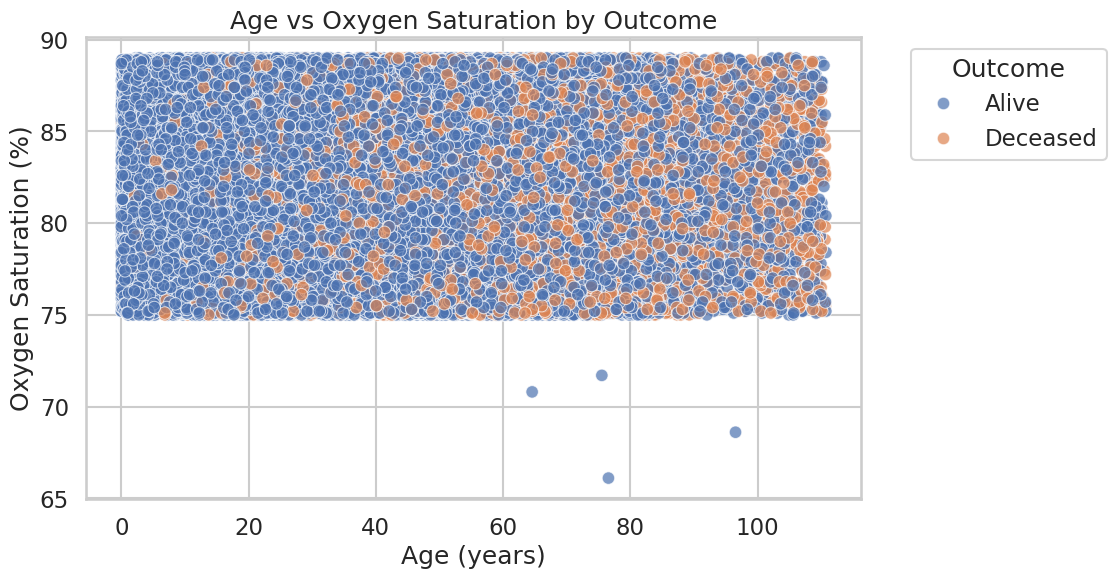

In [5]:
sns.scatterplot(
    data=df.dropna(subset=["age_at_visit_years", "oxygen_saturation_percent"]),
    x="age_at_visit_years",
    y="oxygen_saturation_percent",
    hue="deceased_flag",
    alpha=0.7
)
plt.title("Age vs Oxygen Saturation by Outcome")
plt.xlabel("Age (years)")
plt.ylabel("Oxygen Saturation (%)")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()